In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("naukri_data.csv")

In [3]:
df.head(4)

,company,education,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,site_name,skills,Min_pay,Max_pay,min_exp,max_exp,avg_exp,avg_payrate,day,month,year
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,NaN,ITES,150000.0,225000.0,0.0,1.0,0.5,187500.0,21.0,5.0,2016.0
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,NaN,Marketing,150000.0,250000.0,0.0,0.0,0.0,200000.0,21.0,5.0,2016.0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bangalore,Pl/sql Developer - SQL,NaN,NaN,IT Software - Application Programming,NaN,NaN,4.0,8.0,6.0,NaN,13.0,10.0,2016.0
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bangalore, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,NaN,Accounts,NaN,NaN,11.0,15.0,13.0,NaN,13.0,10.0,2016.0


In [4]:
data=df.copy()

In [5]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'Min_pay', 'Max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

# Analyse the relationship between experience and payrate

<AxesSubplot:xlabel='min_exp', ylabel='Min_pay'>

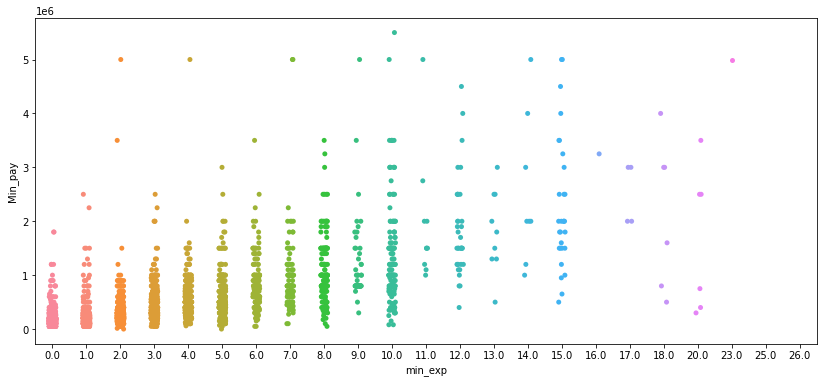

In [6]:
plt.figure(figsize=(14,6))
sns.stripplot(x='min_exp',y='Min_pay', data=data)

<AxesSubplot:xlabel='min_exp', ylabel='Min_pay'>

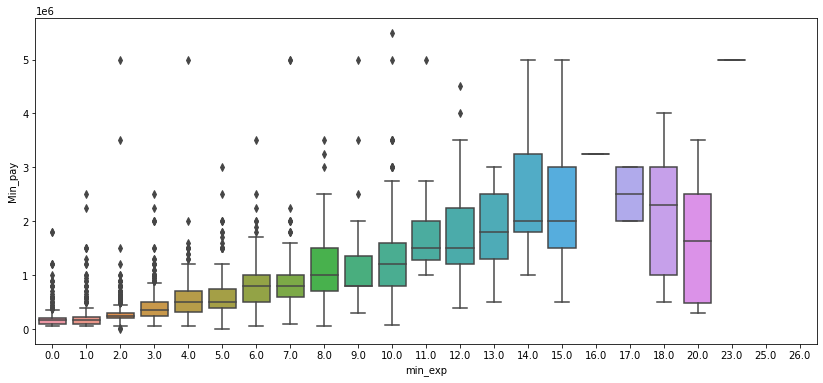

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(x='min_exp',y='Min_pay', data=data)

# Median of the max_pay in different industries

<AxesSubplot:xlabel='industry'>

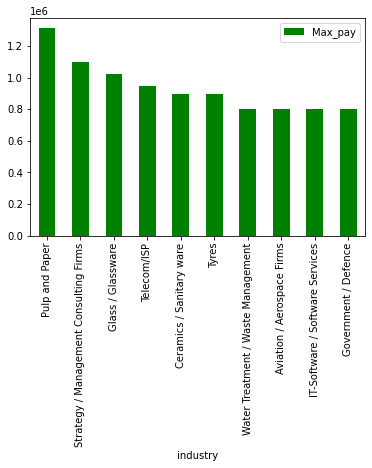

In [8]:
ind_med=data[['Max_pay','industry']].groupby(['industry']).median().sort_values(by='Max_pay', ascending=False).head(10).plot(kind='bar', color='green')
ind_med

<AxesSubplot:xlabel='industry'>

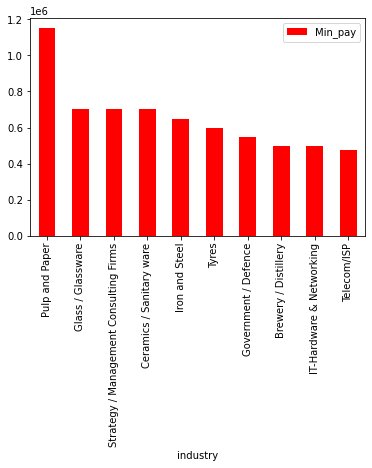

In [9]:
data[['Min_pay','industry']].groupby(['industry']).median().sort_values(by='Min_pay', ascending=False).head(10).plot(kind='bar', color='red')

# Which is my top rated skills 

In [10]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'Min_pay', 'Max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

In [11]:
data['skills'].nunique()

45

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'ITES'),
  Text(1, 0, 'Marketing'),
  Text(2, 0, 'IT Software - Application Programming'),
  Text(3, 0, 'Accounts'),
  Text(4, 0, 'Production'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'IT Software - Other'),
  Text(7, 0, 'Executive Assistant'),
  Text(8, 0, 'IT Software - Mobile'),
  Text(9, 0, 'Engineering Design'),
  Text(10, 0, 'Financial Services'),
  Text(11, 0, 'Hotels'),
  Text(12, 0, 'IT Software - QA & Testing'),
  Text(13, 0, 'HR'),
  Text(14, 0, 'Supply Chain'),
  Text(15, 0, 'IT Software - Network Administration'),
  Text(16, 0, 'Architecture'),
  Text(17, 0, 'Legal'),
  Text(18, 0, 'Site Engineering'),
  Text(19, 0, 'Journalism'),
  Text(20, 0, 'IT Software - DBA'),
  Text(21, 0, 'Strategy'),
  Text(22, 0, 'Medical'),
  Text(23, 0, 'Design'),
  Text(24, 0, 'Def

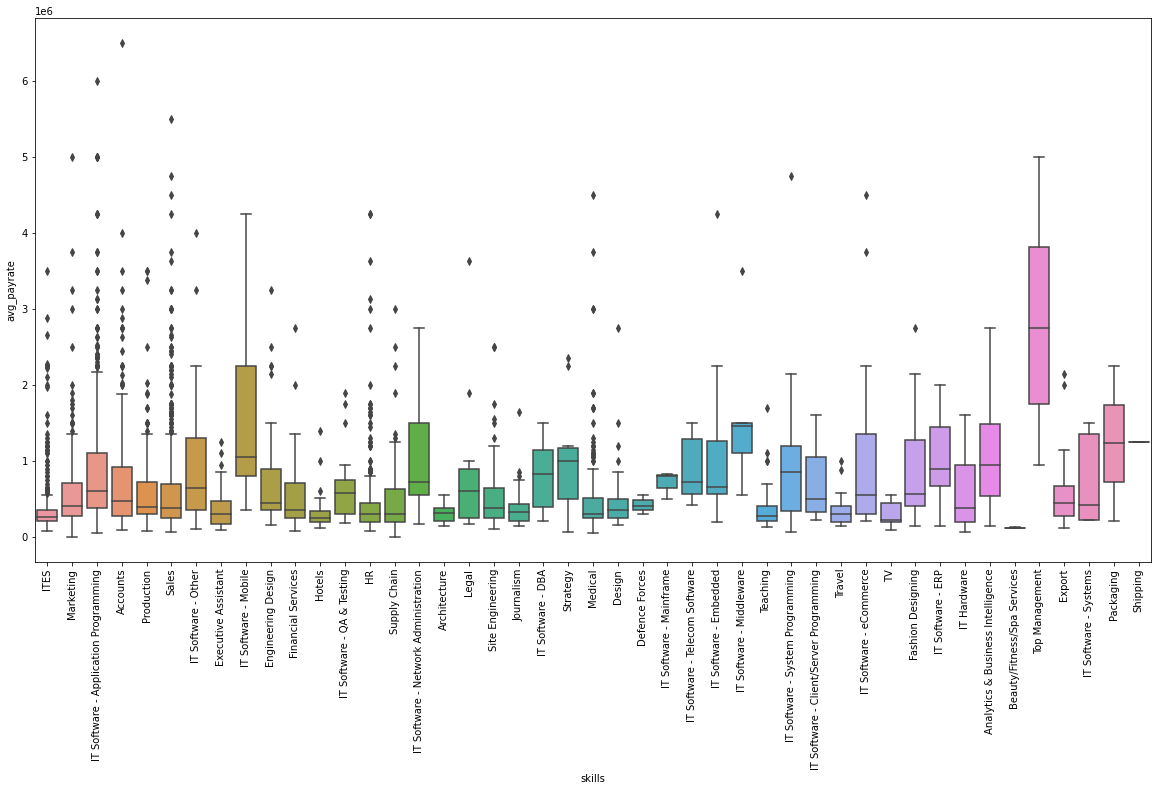

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(x='skills', y='avg_payrate', data=data)
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='skills'>

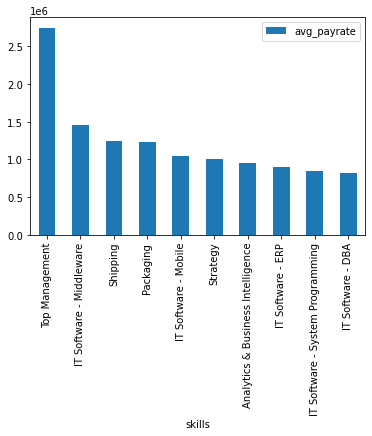

In [18]:
data[['skills','avg_payrate']].groupby(['skills']).median().reset_index().sort_values(by='avg_payrate',ascending=False).head(10).set_index('skills').plot(kind='bar')

# Analyze the number of positions

In [19]:
data.columns

Index(['company', 'education', 'industry', 'jobdescription', 'jobid',
       'joblocation_address', 'jobtitle', 'numberofpositions', 'site_name',
       'skills', 'Min_pay', 'Max_pay', 'min_exp', 'max_exp', 'avg_exp',
       'avg_payrate', 'day', 'month', 'year'],
      dtype='object')

array([<AxesSubplot:ylabel='numberofpositions'>], dtype=object)

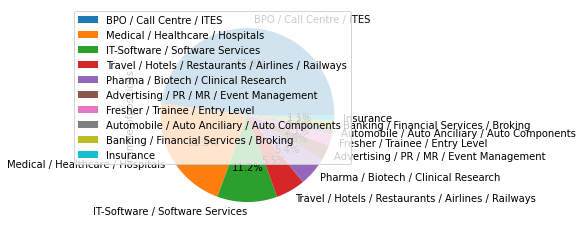

In [34]:
data[['industry','numberofpositions']].groupby(['industry']).sum().sort_values(by='numberofpositions', ascending=False).head(10).plot(kind='pie', subplots=True, autopct='%1.1f%%')